In [7]:
# 0 IS BLACK
# 255 IS WHITE
from math import *
from fractions import Fraction
import random

import numpy as np
import pandas as pd

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Statevector
from qiskit_braket_provider import BraketLocalBackend

class QuantumCircuitGenerator:

    hexColorArray = []
    gValColorArray = []
    thetaColorArray = []

    qubitCount = 0

    qCircuit = None
    encryptionCircuit = []
    encryptionKey = None

    def __init__(self, colorArray, encryptionKey) -> None:
        self.encryptionKey = encryptionKey
        self.hexColorArray = colorArray
        for hexColor in self.hexColorArray:
            hexColor = hexColor.lstrip("#")
            RGB = tuple(int(hexColor[i:i+2], 16) for i in (0, 2, 4))
            gVal = RGB[0]
            self.gValColorArray.append(gVal)
            theta = self.gVal2Theta(gVal)
            self.thetaColorArray.append(theta)
        self.qubitCount = len(self.hexColorArray)

    def generateQuantumCircuit(self):
        qCirc = QuantumCircuit(self.qubitCount)
        for pos in range(self.qubitCount):
            qCirc.ry(self.thetaColorArray[pos],pos)
        self.qCircuit = qCirc

    def gVal2Theta(self, gValue):
        return (gValue/255)*pi
    
    def applyEncryptionGate(self):
        self.encryptionCircuit = QuantumCircuit(len(self.encryptionKey))
        for index in range(len(self.encryptionKey)):
            match self.encryptionKey[index]:
                case "X":
                    self.encryptionCircuit.x(index)
                case "Y":
                    self.encryptionCircuit.y(index)
                case "Z":
                    self.encryptionCircuit.z(index)
                case "H":
                    self.encryptionCircuit.h(index)
                case "S":
                    self.encryptionCircuit.s(index)
                case "C":
                    self.encryptionCircuit.id(index)
        self.encryptionCircuit = self.encryptionCircuit.to_gate()
        self.qCircuit.append(self.encryptionCircuit,range(len(self.encryptionKey)))
    
    def runCircuit(self):
        shotCount = 10000
        newSim = BraketLocalBackend()
        task = newSim.run(self.qCircuit,shots=shotCount)
        results = task.result()
        self.recentCounts = results.get_counts()
        self.recentData = results.data()
        self.recentFrequency = self.recentData["counts"]

    def runCircuit(self):
        # Run sim on decrypted image
        shotCount = 10000
        newSim = BraketLocalBackend()
        task = newSim.run(self.qCircuit,shots=shotCount)
        results = task.result()
        self.counts = results.get_counts()
        data = results.data()
        frequency = data["counts"]
        plot_histogram(self.counts)
    

#~~~~~
c = QuantumCircuitGenerator(["#a0a0a0" for x in range(5)], [random.choice(["X","Y","Z","H","S","C"]) for x in range(5)])
print(c.gValColorArray)
print(c.thetaColorArray)
c.generateQuantumCircuit()
c.applyEncryptionGate()
c.applyEncryptionGate()
print(c.encryptionKey)
c.qCircuit.draw()

[160, 160, 160, 160, 160]
[1.9711953904877133, 1.9711953904877133, 1.9711953904877133, 1.9711953904877133, 1.9711953904877133]
['X', 'C', 'Y', 'X', 'Y']


┌────────────┐┌──────────────┐┌──────────────┐
q_0: ┤ Ry(1.9712) ├┤0             ├┤0             ├
     ├────────────┤│              ││              │
q_1: ┤ Ry(1.9712) ├┤1             ├┤1             ├
     ├────────────┤│              ││              │
q_2: ┤ Ry(1.9712) ├┤2 circuit-195 ├┤2 circuit-198 ├
     ├────────────┤│              ││              │
q_3: ┤ Ry(1.9712) ├┤3             ├┤3             ├
     ├────────────┤│              ││              │
q_4: ┤ Ry(1.9712) ├┤4             ├┤4             ├
     └────────────┘└──────────────┘└──────────────┘

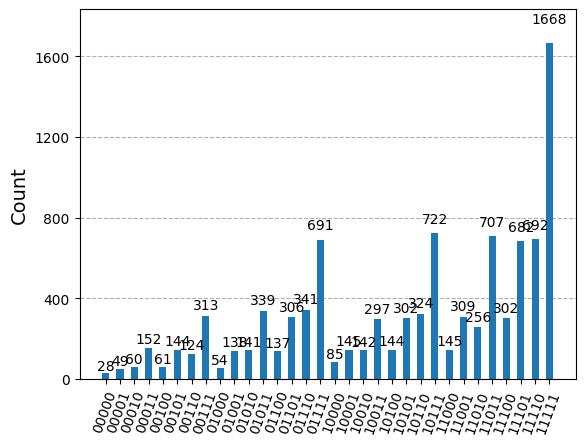

In [8]:
c.runCircuit()
plot_histogram(c.counts)